In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [16, 3]

In [2]:
from pyod.models.knn import KNN

In [15]:
def plot_outliers(outliers, data, method='KNN',halignment = 'right', valignment = 'top',labels=False):
    ax = data.plot(alpha=0.6)
    if labels:
        for i in outliers['value'].items():
            plt.plot(i[0], i[1], 'v', markersize=8, markerfacecolor='none', markeredgecolor='k')
            plt.text(i[0], i[1]-(i[1]*0.04), f'{i[0].strftime("%m/%d")}',horizontalalignment=halignment,verticalalignment=valignment)
    else:
        data.loc[outliers.index].plot(ax=ax, style='rX', markersize=9)
        plt.title(f'WADI - {method}')
        plt.xlabel('date'); plt.ylabel('signal')
        plt.legend(['WADI','outliers'])
        plt.show()

In [3]:
df_attack = pd.read_csv("Data_sets/WADI_attackdataLABLE.csv", header = 1)

In [4]:
df_attack = df_attack.iloc[:-2] # remove last two rows as they have NaN time stamp
Time_Stamp = pd.date_range(start='2017-10-09 18:00:00', periods = 172801, freq='s') # create time frame starting from 10/09 1800 to 10/11 1800 (2days)
df_attack['Time_Stamp'] = Time_Stamp # add new column with time stamp

In [5]:
df_test = df_attack[['Time_Stamp', '1_FIT_001_PV']]

In [59]:
df_test_red = df_test.resample('30S', on='Time_Stamp').mean()

In [62]:
knn = KNN(contamination=0.01, method = 'mean', n_neighbors=2)
knn.fit(df_test_red)

KNN(algorithm='auto', contamination=0.01, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=2, p=2,
  radius=1.0)

In [63]:
predicted = pd.Series(knn.predict(df_test_red), index=df_test_red.index)
print('Number of outliers = ', predicted.sum())

Number of outliers =  12


In [64]:
outliers = predicted[predicted == 1]

In [65]:
outliers = df_test_red.loc[outliers.index]

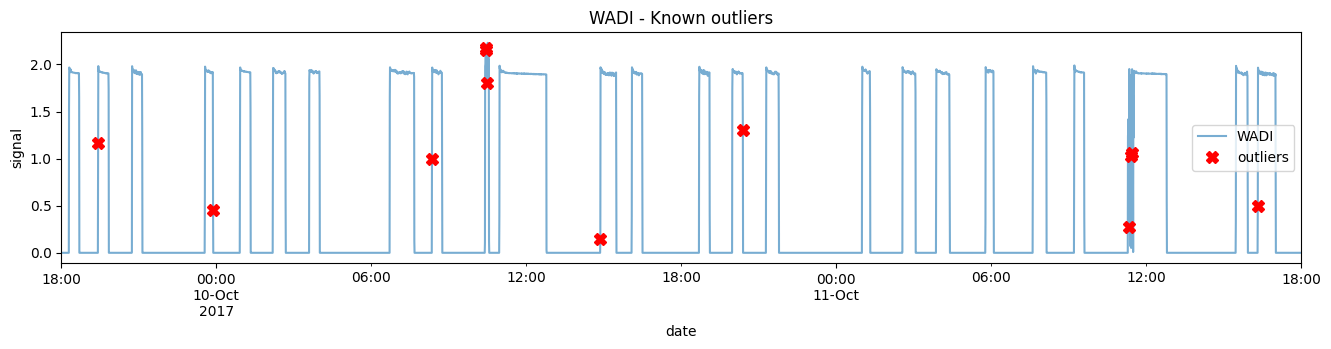

In [66]:
plot_outliers(outliers, df_test_red, 'Known outliers')

In [12]:
outliers

,1_FIT_001_PV
Time_Stamp,
2017-10-09 19:25:30,1.168505
2017-10-09 23:52:30,0.456645
2017-10-10 08:21:00,0.993753
2017-10-10 10:25:30,2.151239
2017-10-10 10:27:30,2.176806
2017-10-10 10:28:00,1.804443
2017-10-10 14:52:00,0.150613
2017-10-10 20:23:00,1.308647
2017-10-11 11:19:00,0.272321
